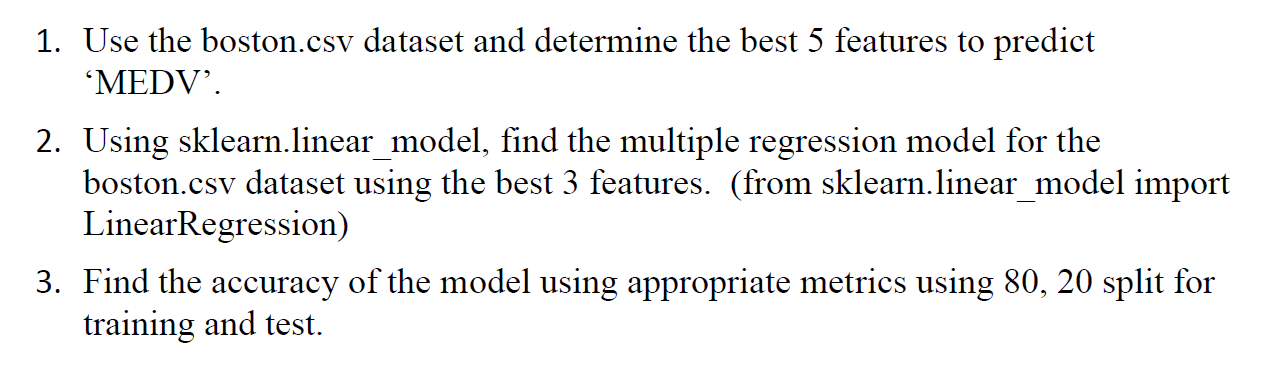

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("boston.csv")
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [ ]:
#Q1 Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.
sorted_corr = df[df.columns[1:]].corr()['medv'][:-1]
print("From the list we can see that lstat, rm, ptratio, indus and tax are the best 5 features to predict medv")
sorted_corr.reindex(sorted_corr.abs().sort_values().index)

From the list we can see that lstat, rm, ptratio, indus and tax are the best 5 features to predict medv


chas       0.175260
dis        0.249929
black      0.333461
zn         0.360445
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
rm         0.695360
lstat     -0.737663
Name: medv, dtype: float64

In [ ]:
#Q2 Using sklearn.linear_model, find the multiple regression model for the 
#boston.csv dataset using the best 3 features
from sklearn.linear_model import LinearRegression
print("We know that lstat, rm and ptratio are the best 3 features to predict medv so we use multiple regression model involving those three")
x = df[['lstat', 'rm', 'ptratio']].copy()
y = df['medv']

We know that lstat, rm and ptratio are the best 3 features to predict medv so we use multiple regression model involving those three


In [ ]:
#Q3 Find the accuracy of the model using appropriate metrics using 80, 20 split for 
#training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)

In [ ]:
linreg = LinearRegression()
# fitting the training data
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction = linreg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2s = r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
print('R2 score =',r2s)
print('Mean Squared Error =', mse)
print('Root Mean Squared Error =', np.sqrt(mean_squared_error(y_test,y_prediction)))

R2 score = 0.6742567149507563
Mean Squared Error = 26.84295993993752
Root Mean Squared Error = 5.181019198954731
